# Sarcasm Detection using the Pre-Trained BERT model from Transformers 

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from transformers import TFBertModel, BertTokenizer
from sklearn.model_selection import train_test_split


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [3]:
data = pd.read_json("../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json", lines=True)
labels = data.is_sarcastic.values
sentences = data.headline.values
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


**Tokenizing all the sentences using pre-trained BERT model from Tranformers**

In [4]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME,do_lower_case = True)

def encoder(sentences):
  ids = []
  for sentence in sentences:
    encoding = tokenizer.encode_plus(
    sentence,
    max_length=16,
    truncation = True,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=False)
    ids.append(encoding['input_ids'])
  return ids

#Train test split
train_sents,test_sents, train_labels, test_labels  = train_test_split(sentences,labels,test_size=0.15)

train_ids = encoder(train_sents)
test_ids = encoder(test_sents) 

In [5]:
print(train_sents[:5])
print(train_ids[:5])

["watch vin diesel say 'i am groot' in different languages"
 "the lgbt activist's question that left ben carson speechless"
 'area man may have lied about having sex'
 'gorgeous long exposure train photos prove the city has its own magic'
 'video appears to show 76er jahlil okafor in street fight']
[[101, 3422, 19354, 7937, 2360, 1005, 1045, 2572, 24665, 17206, 1005, 1999, 2367, 4155, 102, 0], [101, 1996, 12010, 7423, 1005, 1055, 3160, 2008, 2187, 3841, 9806, 25146, 102, 0, 0, 0], [101, 2181, 2158, 2089, 2031, 9828, 2055, 2383, 3348, 102, 0, 0, 0, 0, 0, 0], [101, 9882, 2146, 7524, 3345, 7760, 6011, 1996, 2103, 2038, 2049, 2219, 3894, 102, 0, 0], [101, 2678, 3544, 2000, 2265, 6146, 2121, 14855, 27766, 2140, 7929, 10354, 2953, 1999, 2395, 102]]


512
vector length -> cant plot 
how to plot -> a tool  TSNE plot -> projected to 2d and plotted -> plot all these feature vectors 

-- 
op : 2 classes -> promintnet 2 cluster should be there
for which word embedding or sentences the dont go in the clusters 
so why these are not in the prominent cluster 
before using the BERt model can i add a preprocessing step which can enhance the classification of the models.

--
BERT has layers, for each layer how data is being separated and in which layer it is 


-- 
or in post-processing 
validation 

Converting arrays to tensors

In [6]:
test_labels_x = test_labels
test_ids_x = test_ids

In [7]:

train_ids = tf.convert_to_tensor(train_ids)
test_ids = tf.convert_to_tensor(test_ids)
test_labels = tf.convert_to_tensor(test_labels)
train_labels = tf.convert_to_tensor(train_labels)

In [8]:

print(train_ids[:5])
print(test_ids[:5])
print(test_labels[:5])

tf.Tensor(
[[  101  3422 19354  7937  2360  1005  1045  2572 24665 17206  1005  1999
   2367  4155   102     0]
 [  101  1996 12010  7423  1005  1055  3160  2008  2187  3841  9806 25146
    102     0     0     0]
 [  101  2181  2158  2089  2031  9828  2055  2383  3348   102     0     0
      0     0     0     0]
 [  101  9882  2146  7524  3345  7760  6011  1996  2103  2038  2049  2219
   3894   102     0     0]
 [  101  2678  3544  2000  2265  6146  2121 14855 27766  2140  7929 10354
   2953  1999  2395   102]], shape=(5, 16), dtype=int32)
tf.Tensor(
[[  101  9932 11417 19845 25530 12805  8711  2076  4068  2143  2782   102
      0     0     0     0]
 [  101  7133  3331  2502  2208  2055  2108  4142  2279  2095   102     0
      0     0     0     0]
 [  101  2111  5223 10958 14227 21135  2061  2172  2009  2453  3465 18520
   7207  4307   102     0]
 [  101  3899  2064  1005  1056  2903  3954  2187  2006  8239  5796 28957
   2000  2562  2009   102]
 [  101  2122 13528 22276  2808  2020  

Building Model from transformers using pre-trained bert-base-uncased (12-layer, 768-hidden, 12-heads, 110M parameters.)

In [9]:
bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
bert_encoder

In [10]:
input_word_ids = tf.keras.Input(shape=(16,), dtype=tf.int32, name="input_word_ids")  
# input_word_ids
embedding = bert_encoder([input_word_ids])
embedding

(<tf.Tensor 'tf_bert_model/bert/encoder/layer_._11/output/LayerNorm/batchnorm/add_1:0' shape=(None, 16, 768) dtype=float32>,
 <tf.Tensor 'tf_bert_model/bert/pooler/dense/Tanh:0' shape=(None, 768) dtype=float32>)

In [11]:
bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
input_word_ids = tf.keras.Input(shape=(16,), dtype=tf.int32, name="input_word_ids")  
embedding = bert_encoder([input_word_ids])
dense = tf.keras.layers.Lambda(lambda seq: seq[:, 0, :])(embedding[0])
dense = tf.keras.layers.Dense(128, activation='relu')(dense)
dense = tf.keras.layers.Dropout(0.2)(dense)   
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)    

model = tf.keras.Model(inputs=[input_word_ids], outputs=output)  


In [12]:
model.compile(tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 16)]              0         
_________________________________________________________________
tf_bert_model_1 (TFBertModel ((None, 16, 768), (None,  109482240 
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               98432     
_________________________________________________________________
dropout_74 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 109,580,801
Trainable params: 109,580,801
Non-trainable params: 0
________________________________________

In [13]:
history = model.fit(x = train_ids, y = train_labels, epochs = 3, verbose = 1, batch_size = 32, validation_data = (test_ids, test_labels))

Epoch 1/3
761/761 [==============================] - 90s 119ms/step - loss: 0.3091 - accuracy: 0.8637 - val_loss: 0.2168 - val_accuracy: 0.9133
Epoch 2/3
761/761 [==============================] - 87s 114ms/step - loss: 0.1687 - accuracy: 0.9345 - val_loss: 0.1918 - val_accuracy: 0.9227
Epoch 3/3
761/761 [==============================] - 86s 113ms/step - loss: 0.0963 - accuracy: 0.9653 - val_loss: 0.2204 - val_accuracy: 0.9210


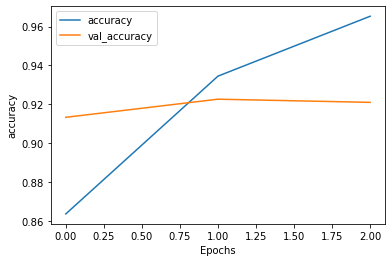

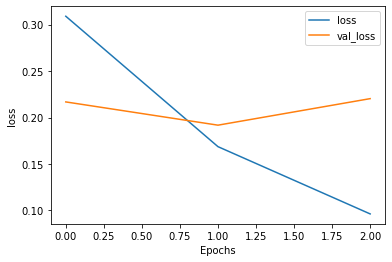

In [14]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [15]:
model1 = model

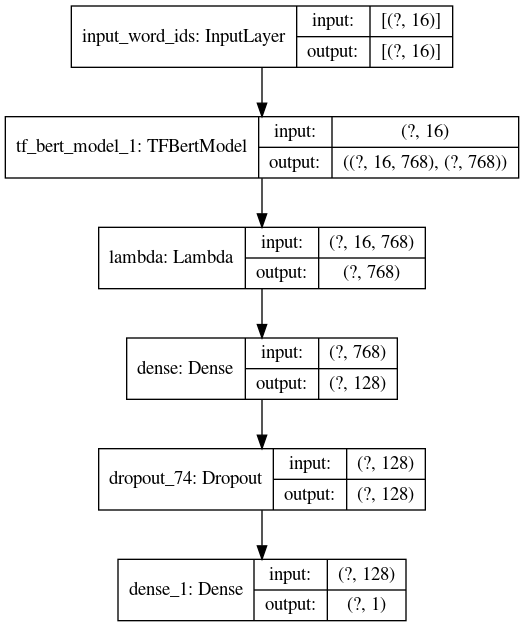

In [16]:
from keras.utils.vis_utils import plot_model
# model = Sequential()
# model.add(Dense(2, input_dim=1, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
plot_model(model1, to_file='TFBertModel_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
# (test_ids, test_labels))
# predict probabilities for test set
yhat_probs = model.predict(test_ids, verbose=0)
# predict crisp classes for test set
# yhat_classes = model.predict_classes(test_ids, verbose=0)

# source: https://stackoverflow.com/questions/38971293/get-class-labels-from-keras-functional-model
yhat_classes = yhat_probs.argmax(axis=-1)

print(yhat_probs[:3])
print(yhat_classes[:3])
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes

[[0.02870473]
 [0.9945726 ]
 [0.01720729]]
[0 0 0]


In [18]:
# https://stackoverflow.com/questions/55074681/how-to-find-the-wrong-predictions-in-keras

# model.fit(x_nyha, y_nyha, batch_size=batch_size, epochs=num_epochs, verbose=1)
# prediction = np.round(model.predict(test_ids))
test_labels1 = tf.cast(test_labels, dtype='float')
yhat_probs1 = tf.convert_to_tensor(np.round(yhat_probs))
wrong_predictions = test_labels[yhat_probs1 != test_labels1]


In [19]:
test_labels1[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 1., 0., 1., 0., 1., 0., 0.], dtype=float32)>

In [20]:
yhat_probs1[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 1., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [21]:
wrong_predictions[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1])>

In [22]:
wrong_predictions

<tf.Tensor: shape=(339,), dtype=int64, numpy=
array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
     

In [23]:
wrong_predictions_test_sents = test_sents[yhat_probs1 != test_labels1]
# wrong_predictions_test_ids_x = test_ids_x[yhat_probs1 != test_labels1]
wrong_predictions_test_ids = test_ids[yhat_probs1 != test_labels1]



In [24]:
print(wrong_predictions_test_sents[:10])
# print(wrong_predictions_test_ids_x[:10])
print(wrong_predictions_test_ids[:10])


['oil prices soar like noble eagle'
 'conservative media finally starting to realize that racism is a problem'
 'paul ryan quickly runs tweet about texas shooting past wayne lapierre before posting'
 "church honors 'dearly beloved' prince by putting his lyrics on sign"
 'son needs costume, 30 individually wrapped treats tomorrow morning for some school celebration'
 'garroting survivors call for wire ban'
 'acne medication may cause dizziness, nausea, loss of hearing, insomnia, blood clotting, difficulty breathing'
 'woman gets several job offers after handing out resumes on the side of the road'
 'americans demand military response after chinese shoot down directv satellite'
 "gallant amazon user heroically defends 'fringe' season 2 box set from negative reviewers"]
tf.Tensor(
[[  101  3514  7597  2061  2906  2066  7015  6755   102     0     0     0
      0     0     0     0]
 [  101  4603  2865  2633  3225  2000  5382  2008 14398  2003  1037  3291
    102     0     0     0]
 [  101  

In [25]:
# https://www.edureka.co/community/22922/index-of-predicted-wrong-data-in-keras-how-to-find-it
# pred = model.predict(test_ids)
pred = yhat_probs
indices = [i for i,v in enumerate(pred) if pred[i]!=test_labels[i]]
subset_of_wrongly_predicted = [test_labels[i] for i in indices ]

In [26]:
cnt = 0
for i in indices:
    print(i)
    print(test_labels[i])
    cnt+=1
    if cnt>10:
        break
        
    

1
tf.Tensor(1, shape=(), dtype=int64)
3
tf.Tensor(1, shape=(), dtype=int64)
5
tf.Tensor(1, shape=(), dtype=int64)
7
tf.Tensor(1, shape=(), dtype=int64)
13
tf.Tensor(1, shape=(), dtype=int64)
15
tf.Tensor(1, shape=(), dtype=int64)
16
tf.Tensor(1, shape=(), dtype=int64)
17
tf.Tensor(1, shape=(), dtype=int64)
20
tf.Tensor(1, shape=(), dtype=int64)
23
tf.Tensor(1, shape=(), dtype=int64)
26
tf.Tensor(1, shape=(), dtype=int64)


In [27]:
# test_labels_x = test_labels
# test_ids_x = test_ids
# test_sents
print('\n original sentence: \n')
print(test_sents[:10])
print('\n BERT encoded tokenized sentence ids: \n')
print(test_ids_x[:10])
print('\n Labels orginal: \n')
print(test_labels_x[:10])
print('\n tensor converted sentence ids: \n')
print(test_ids[:10])
print('\n tensor converted sentence labels: \n')
print(test_labels[:10])
print('\n---------------')


 original sentence: 

['ai weiwei commemorates drowned refugees during berlin film festival'
 'grandmother talking big game about being alive next year'
 'people hate rahm emanuel so much it might cost hillary clinton illinois'
 "dog can't believe owner left on fucking msnbc to keep it company while she at work"
 'these vintage coloring books were around before adult coloring was cool'
 'nation allows itself 5 minutes to believe this all going to be over soon'
 "32 data breaches larger than sony's in the past year"
 'oil prices soar like noble eagle'
 "friday's morning email: here's how trump is undermining obamacare"
 'an eye-opening look at school playgrounds around the world']

 BERT encoded tokenized sentence ids: 

[[101, 9932, 11417, 19845, 25530, 12805, 8711, 2076, 4068, 2143, 2782, 102, 0, 0, 0, 0], [101, 7133, 3331, 2502, 2208, 2055, 2108, 4142, 2279, 2095, 102, 0, 0, 0, 0, 0], [101, 2111, 5223, 10958, 14227, 21135, 2061, 2172, 2009, 2453, 3465, 18520, 7207, 4307, 102, 0], [1

In [28]:
print(len(subset_of_wrongly_predicted))
print(test_labels.shape)
subset_of_wrongly_predicted[:5]

2077
(4293,)


[<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [30]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(test_labels, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_labels, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_labels, yhat_classes)
print(matrix)

Accuracy: 0.516189
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000
Cohens kappa: 0.000000
ROC AUC: 0.977565
[[2216    0]
 [2077    0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

TP, FP, FN, TN = get_confusion_matrix_values(test_labels, yhat_classes)